<a href="https://colab.research.google.com/github/spirosChv/smartNetsWorkshop/blob/main/neuron/practical2_basicNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The NEURON Simulator

In [56]:
# @title Make nicer plots -- Execute this cell
import matplotlib.pyplot as plt


def mystyle():
  """
  Create custom plotting style.

  Returns
  -------
  my_style : dict
      Dictionary with matplotlib parameters.

  """
  # color pallette
  style = {
      # Use LaTeX to write all text
      "text.usetex": False,
      "font.family": "DejaVu Sans",
      "font.weight": "bold",
      # Use 16pt font in plots, to match 16pt font in document
      "axes.labelsize": 16,
      "axes.titlesize": 20,
      "font.size": 16,
      # Make the legend/label fonts a little smaller
      "legend.fontsize": 14,
      "xtick.labelsize": 14,
      "ytick.labelsize": 14,
      "axes.linewidth": 2.5,
      "lines.markersize": 10.0,
      "lines.linewidth": 2.5,
      "xtick.major.width": 2.2,
      "ytick.major.width": 2.2,
      "axes.labelweight": "bold",
      "axes.spines.right": False,
      "axes.spines.top": False
  }

  return style


plt.style.use("seaborn-colorblind")
plt.rcParams.update(mystyle())

# What is NEURON?

The NEURON simulation environment is a powerful engine for performing simulations of neurons and biophysical neural networks. It permits the construction of biologically realistic membranes with active and passive ion channels, combined with virtual connectivity and electrophysiology tools to drive and measure neuron and network behaviors.

In [57]:
!pip install neuron --quiet

## Step 1: Import the neuron module into Python.

We begin by loading NEURON’s h module.

In [58]:
import neuron
print(neuron.__version__)

8.1.0


There are only a limited number of functions avaiable directly from the neuron module. In practice, we usually want to directly import the submodules we need; i.e., do something like the below instead:

In [59]:
from neuron import h

When using NEURON, you will always want the h submodule. You may or may not need to import the additional submodules mentioned above. If you do, they can be imported separately or loaded in one line with a comma separated list, as in:

In [60]:
from neuron import h, rxd

NEURON assumes certain default units (concentration in mM, time in ms, voltage in mV), but units can be specified explicitly by importing unit definitions from neuron.units. Even if you are using the default units, being explicit makes your code more readable by others. For example:

In [61]:
from neuron.units import ms, mV

If the above gives you an error, then you are using a version of NEURON older than 7.7. Update before proceeding.

## Step 2: Create a cell

A `Section` is the basic morphological building-block in NEURON. We typically think of a Section as an unbranched cable, but it can also be used to represent a soma. Thus a simple model neuron with only a soma can be created as in:

In [62]:
soma = h.Section(name='soma')

Aside 1: NEURON's `h.topology` function.

NEURON's `h.topology()` function displays the topological structure of the entire model, indicating which sections are connected to which sections, where they are connected, and how many segments each section is divided into.

If you're following along with our example, there's not much to see yet since there is only one section, but it does demonstrate that the soma has been created and has one segment (one dash is shown):

In [63]:
h.topology()


|-|       soma(0-1)
|-|       soma(0-1)
|-|       soma(0-1)



1.0

The `h.topology()` function displays its data to screen and returns 1.0 indicating success (this function always succeeds). Note: This function is only for displaying data; other methods must be used to store the data in a variable for programmatic analysis.

### Aside 2: NEURON’s psection() function.

Every NEURON section has a `psection` method (think: properties of the section) that returns a Python dictionary providing a structured data representation of the properties of the section.

For example, we can query the soma via:

In [64]:
soma.psection()

{'Ra': 35.4,
 'cell': None,
 'cm': [1.0],
 'density_mechs': {},
 'hoc_internal_name': '__nrnsec_0x37b40c0',
 'ions': {},
 'morphology': {'L': 100.0,
  'diam': [500.0],
  'parent': None,
  'pts3d': [],
  'trueparent': None},
 'name': 'soma',
 'nseg': 1,
 'point_processes': {},
 'regions': set(),
 'species': set()}

The results tell us the soma is a cylinder with length $100 microns$, diameter $500 microns$, axial resistivity $35.4 ohm*cm$, and specific membrance capacitance $1 \mu F/cm^2$

**Note:** calling this method does not itself print anything to the screen. Instead it returns a dictionary. We see the contents of the dictionary only because we are running interactively; from a script, nothing would be printed unless we explicitly printed it with print, or, better pretty-printed it with pprint.pprint.

Since this is a dictionary, we can extract any properties we want using square brackets. For example, the length of the section is:

In [65]:
soma.psection()['morphology']['L']

100.0

All of these values can be individually accessed in more efficient ways, but psection provides an overview of the full properties of the section.

For example, the length of the soma is more efficiently available (and settable) via:

In [66]:
soma.L

100.0

`soma.psection()['morphology']['diam']` is a list (of length 1 here), with each entry corresponding to the value for each segment. Similarly for `soma.psection()['cm']`, etc.

Important: You may have noticed that the default diameter is $500 \mu m$, which is excessively large for mammalian neurons. It's the default because it's appropriate for the squid giant axons studied by Hodgkin and Huxley. NEURON also uses squid-relevant values for axial resistivity (soma.Ra) and temperature (`h.celsius`). These should all be adjusted for mammalian models.

### Aside 3: Python’s dir() function.

We can also probe objects with Python’s built-in `dir()` function. Let’s see what it says about soma.

In [67]:
dir(soma)

['L',
 'Ra',
 '__call__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'allseg',
 'arc3d',
 'cell',
 'children',
 'connect',
 'diam3d',
 'disconnect',
 'has_membrane',
 'hname',
 'hoc_internal_name',
 'insert',
 'is_pysec',
 'n3d',
 'name',
 'nseg',
 'orientation',
 'parentseg',
 'psection',
 'pt3dadd',
 'pt3dchange',
 'pt3dclear',
 'pt3dinsert',
 'pt3dremove',
 'pt3dstyle',
 'push',
 'rallbranch',
 'same',
 'spine3d',
 'subtree',
 'trueparentseg',
 'uninsert',
 'wholetree',
 'x3d',
 'y3d',
 'z3d']

This tells us all of the Python methods and variables associated with the object. Any methods with two leading and trailing underscores are reserved by Python and may or may not be implemented by the object. The other items in the list are additional members of soma that we can call. To see all of the functions available to the neuron variable h, try calling `dir(h)`.

### Aside 4: Getting more help.

In addition to probing objects with `dir()`, help from docstrings is available using `help()`.

```python
help(object_or_variable)
```

For example, from `dir(soma)`, we know that `connect` is available. Let’s inquire about that.

In [68]:
help(soma.connect)

Help on built-in function connect:

connect(...) method of nrn.Section instance
    childSection.connect(parentSection, [parentX], [childEnd]) or
    childSection.connect(parentSegment, [childEnd])



## Step 3: Set the cell's morphological properties

Since we're simulating a soma, the default length of $100 \mu m$ and diameter of $500 \mu m$ are inappropriate. Let's set the length (`L`) and diameter (`diam`) to $20 \mu m$ instead:

In [69]:
soma.L = 20
soma.diam = 20

In many models, you will have cells consisting of many connected sections. In brief, this can be done using the Section's connect method. That will be described in a subsequent part of the tutorial. For now though, we consider only the soma.

## Step 4: Biophysical Mechanisms

NEURON comes with a few built in biophysical mechanisms that can be added to a model.

- `pas`: Passive (“leak”) channel.
- `extracellular`: For simulating effects of nonzero extracellular potential, as may happen with leaky patch clamps, or detailed propertes of the myelin sheath.
- `hh`:	Hodgkin-Huxley sodium, potassium, and leakage channels.

### Aside 3: Insert a passive mechanism.

We see from the list of elements after calling `dir(soma)` that `insert` is available. This is the method we will use to insert mechanisms into the membrane. Let’s insert a passive leak conductance across the membrane and do this by passing `pas` as the mechanism type:

In [70]:
soma.insert('pas')

soma

### IMPORTANT: Sections and segments.

A NEURON Section is considered a piece of cylindrical cable. Depending on the resolution desired, it may be necessary to divide the cable into a number of segments where voltage varies linearly between centers of adjacent segments. The number of segments within a section is given by the variable, `nseg`. The total ionic current across the segment membrane is approximately the area of the segment multiplied by the ionic current density at the center of the segment. To access a part of the section, specify a value between 0 and 1, where 0 is typically the end closest to the soma and 1 is the distal end. Because nseg divides the cable into equal-length parts, it should be an odd number so that to address the middle of the cable, (0.5), gives the middle segment.

To summarize, we access sections by their name and segments by some location on the section.

Section: `section`
Segment: `section(loc)`


Using the Python `type()` function can tell us what a variable is:

In [71]:
print("type(soma) = {}".format(type(soma)))
print("type(soma(0.5)) ={}".format(type(soma(0.5))))

type(soma) = <class 'nrn.Section'>
type(soma(0.5)) =<class 'nrn.Segment'>


### Aside 4: Accessing segment variables.

Segment variables follow the idiom:

```python
section(loc).var
```

And for mechanisms on the segment:

```python
section(loc).mech.var
```

or

```python
section(loc).var_mech
```

The first form is preferred.

In [72]:
mech = soma(0.5).pas
print(dir(mech))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'e', 'g', 'i', 'is_ion', 'name', 'segment']


In [73]:
print(mech.g)
print(soma(0.5).pas.g)

0.001
0.001


## Step 5a: Insert an alpha synapse.

Let’s insert an AlphaSynapse object onto the soma to induce some membrane dynamics.

In [74]:
asyn = h.AlphaSynapse(soma(0.5))

AlphaSynapse is a **Point Process**. Point processes are point sources of current. When making a new Point Process, you pass the segment to which it will bind.

Again, with `dir()` function, we can validate that asyn is an object and contains some useful parameters. Let’s look at some of those parameters.

In [75]:
dir(asyn)

['__abs__',
 '__add__',
 '__bool__',
 '__call__',
 '__class__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__next__',
 '__pos__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 'alpha',
 'baseattr',
 'e',
 'get_loc',
 'get_segment',
 'gmax',
 'has_loc',
 'hname',
 'hocobjptr',
 'i',
 'loc',
 'onset',
 'same',
 'tau']

In [76]:
print("asyn.e = {}".format(asyn.e))
print("asyn.gmax = {}".format(asyn.gmax))
print("asyn.onset = {}".format(asyn.onset))
print("asyn.tau = {}".format(asyn.tau))

asyn.e = 0.0
asyn.gmax = 0.0
asyn.onset = 0.0
asyn.tau = 0.1


Let’s assign the onset of this synapse to occur at 20 ms and the maximal conductance to 1.

In [77]:
asyn.onset = 20
asyn.gmax = 1

Let’s look at the state of our cell using neuron’s `psection()`.

In [78]:
h.psection()

soma { nseg=1  L=100  Ra=35.4
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=500}
	insert capacitance { cm=1}
	insert pas { g_pas=0.001 e_pas=-70}
	insert AlphaSynapse { onset=20 tau=0.1 gmax=1 e=0}
	insert IClamp { del=2 dur=0.1 amp=0.9}
}


1.0

# Step 5b: Insert a stimulus

Let's insert a current clamp (an `IClamp` object) into the center of the `soma` to induce some membrane dynamics.

In [79]:
iclamp = h.IClamp(soma(0.5))

An `IClamp` is a **Point Process**. Point processes are point sources of current. When making a new Point Process, you pass the segment to which it will bind.

Again, with the `dir` function, we can validate that `iclamp` is an object and contains some useful parameters. Let's look at some of those parameters. We use a [list comprehension](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) to ignore those elements of the dir that start with double underscores (and are thus Python magic methods and not functions/variables intended to be used directly).

In [80]:
print([item for item in dir(iclamp) if not item.startswith('__')])

['amp', 'baseattr', 'delay', 'dur', 'get_loc', 'get_segment', 'has_loc', 'hname', 'hocobjptr', 'i', 'loc', 'same']


In particular, we notice three key properties of a current clamp: amp -- the amplitude (in nA), delay -- the time the current clamp switches on (in ms), and dur -- how long (in ms) the current clamp stays on. Let's set these values:

In [81]:
iclamp.delay = 2
iclamp.dur = 0.1
iclamp.amp = 0.9

Let's use psection to get a representation of the soma model:

In [82]:
soma.psection()

{'Ra': 35.4,
 'cell': None,
 'cm': [1.0],
 'density_mechs': {'pas': {'e': [-70.0], 'g': [0.001], 'i': [0.0]}},
 'hoc_internal_name': '__nrnsec_0x37b40c0',
 'ions': {},
 'morphology': {'L': 20.0,
  'diam': [20.0],
  'parent': None,
  'pts3d': [],
  'trueparent': None},
 'name': 'soma',
 'nseg': 1,
 'point_processes': {'AlphaSynapse': {AlphaSynapse[2]}, 'IClamp': {IClamp[2]}},
 'regions': set(),
 'species': set()}

## Step 6: Set up recording variables.

The cell should be configured to run a simulation. However, we need to set up variables we wish to record from the simulation. For now, we will record the membrane potential, which is `soma(0.5).v`. References to variables are available as `_ref_rangevariable`.

In [83]:
v_vec = h.Vector().record(soma(0.5)._ref_v)  # Membrane potential vector
t_vec = h.Vector().record(h._ref_t)  # Time stamp vector

## Step 6: Run the simulation.

To run the simulation, we execute the following lines.

In [84]:
h.load_file('stdrun.hoc')
h.tstop = 40.0
h.run()

0.0

**Note:** If we had not included gui in the list of things to import, we would have also had to execute:

`h.load_file('stdrun.hoc')`

which defines the `run()` function (the alternative would be to specify initialization and advance in more detail).

Nowadays, NEURON guidelines use only the `continuerun` function.

In [85]:
h.finitialize(-65)
h.continuerun(40.0)

0.0

## Step 7: Plot the results.

We utilize the pyplot module from the matplotlib Python package to visualize the output.

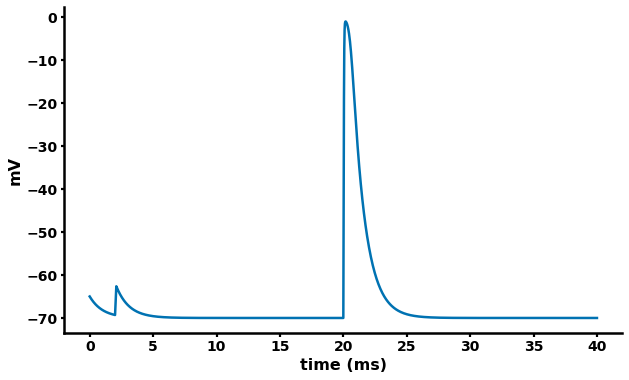

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(t_vec, v_vec)
plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.show()

The last line displays the graph and allows you to interact with it (zoom, pan, save, etc). NEURON and Python will wait until you close the figure window to proceed.

## Step 8: Saving and restoring results.

NEURON Vector objects can be pickled. This allows them to be stored to disk and restored later:

Saving:

In [87]:
# Pickle
import pickle
with open('t_vec.p', 'wb') as t_vec_file:
  pickle.dump(t_vec, t_vec_file)
with open('v_vec.p', 'wb') as v_vec_file:
  pickle.dump(v_vec, v_vec_file)

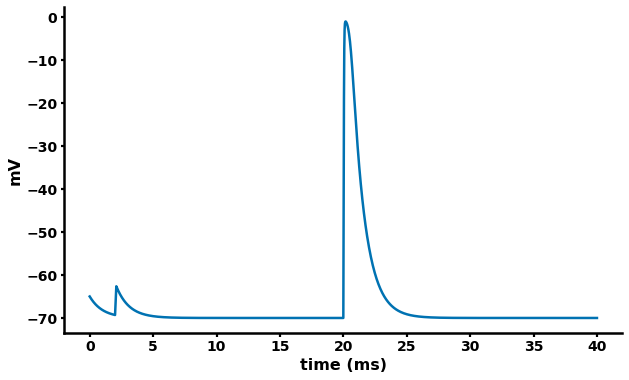

In [88]:
# Unpickle
with open('t_vec.p', 'rb') as t_vec_file:
  t_vec_new = pickle.load(t_vec_file)
with open('v_vec.p', 'rb') as vec_file:
  v_vec_new = pickle.load(vec_file)

# Confirm
plt.figure(figsize=(10, 6))
plt.plot(t_vec_new, v_vec_new)
plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.show()

## Extra Step: Generate a train of presynaptic stimuli

A `NetStim` is a spike generator that can be used as the source in a `NetCon`, behaving as external input onto the synapse of a target cell. The following code makes a `NetStim` object that generates one spike at time $t=9$. The NetCon then adds another ms delay to deliver a synaptic event at time $t=10$ onto the first cell.

The code below makes a stimulator and attaches it to a synapse object ([ExpSyn](https://neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/mechanisms/mech.html#ExpSyn)) that behaves much like an AMPA synapse – it conducts current as a decaying exponential function.

In [89]:
stim = h.NetStim()  # Make a new stimulator

# Attach it to a synapse in the middle of the dendrite
# of the first cell in the network. (Named 'syn_' to avoid
# being overwritten with the 'syn' var assigned later.)
syn_ = h.ExpSyn(soma(0.5))

stim.number = 1
stim.start = 9
ncstim = h.NetCon(stim, syn_)
ncstim.delay = 1
ncstim.weight[0] = 0.04  # NetCon weight is a vector.

Exponentially decaying currents, such as that generated by the synapse `syn_` have dynamics that depend on tau, the time constant. Let's specify a time constant of $2 ms$:

In [90]:
syn_.tau = 2

The parameter `tau` specifies how quickly the currents decay. The exact value of the current depends on the cell's membrane potential, and the synapse's reversal potential, `syn_.e`.

In [91]:
print(f'Reversal potential = {syn_.e} mV')

Reversal potential = 0.0 mV


NetCon syntax

```python
netcon = h.NetCon(source_ref_v, target, [threshold, delay, weight], sec=section)

netcon = h.NetCon(source, target, [threshold, delay, weight])
```

**Note:** The threshold is used when two NEURON sections are connected via a Synapse and defines the presynaptic spike.